<a href="https://colab.research.google.com/github/PranithaReddy2024/gdp-dashboard/blob/main/A7_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Exploratory Data Analysis

In [2]:
#Loading the dataset
df=pd.read_csv("/content/Titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dropping unncesary Columns

In [9]:
#Checking Missing Values:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Dropping the unncessary columns
df=df.drop(['Cabin'],axis=1)

Missing Values & Imputation

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
# As column "Age" is important to understand about the Survivors, we would try to fix the missing value with their Mean / Mode Also column Embark has only 2 missing value, we shall do the samewith  it too

df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Encoding the data types

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Age']=le.fit_transform(df['Age'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Fare']=le.fit_transform(df['Fare'])

In [16]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Name           int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Ticket         int64
Fare           int64
Embarked       int64
dtype: object

Outlier Detection

In [17]:
# detect and treat outliers with z score
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,447.014184,0.395981,2.276596,446.888889,0.653664,39.771868,0.355792,0.268322,334.852246,102.153664,1.520095
std,255.259315,0.489350,0.842142,255.575646,0.476083,16.303808,0.637958,0.579830,202.715490,70.118581,0.803217
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.250000,0.000000,1.000000,224.250000,0.000000,29.000000,0.000000,0.000000,151.250000,40.000000,1.000000
50%,448.500000,0.000000,3.000000,445.500000,1.000000,39.000000,0.000000,0.000000,336.500000,85.000000,2.000000
75%,665.750000,1.000000,3.000000,663.750000,1.000000,48.000000,1.000000,0.000000,516.750000,149.750000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,88.000000,3.000000,2.000000,680.000000,247.000000,2.000000


Data Visualisation & Plotting Outliers

<Axes: >

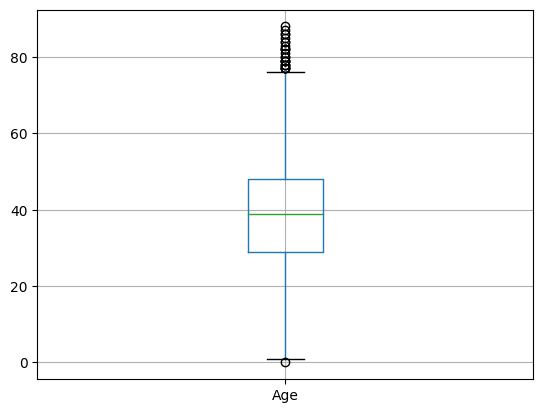

In [18]:
df.boxplot(column=['Age'])

<Axes: >

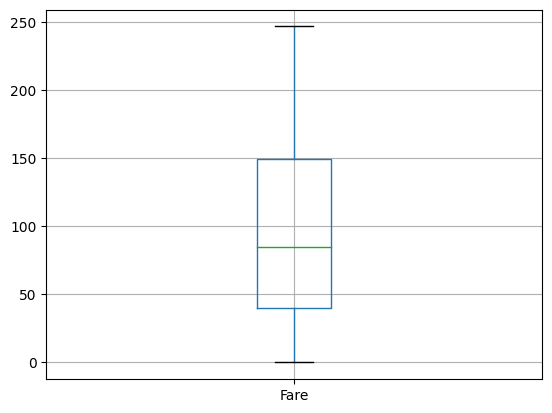

In [19]:

df.boxplot(column=['Fare'])

<Axes: >

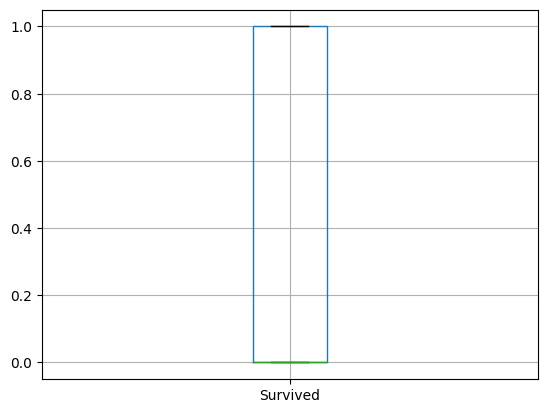

In [20]:

df.boxplot(column=['Survived'])

<Axes: >

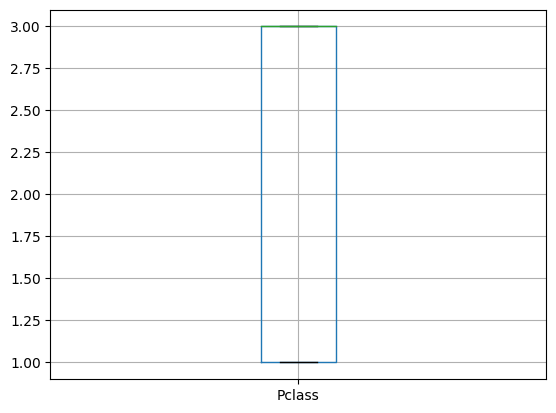

In [21]:

df.boxplot(column=['Pclass'])

<Axes: >

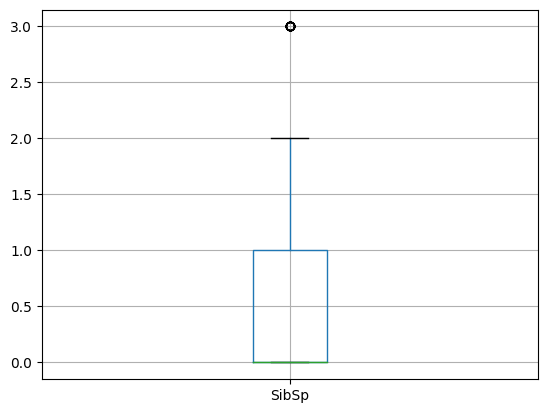

In [22]:

df.boxplot(column=['SibSp'])

<Axes: >

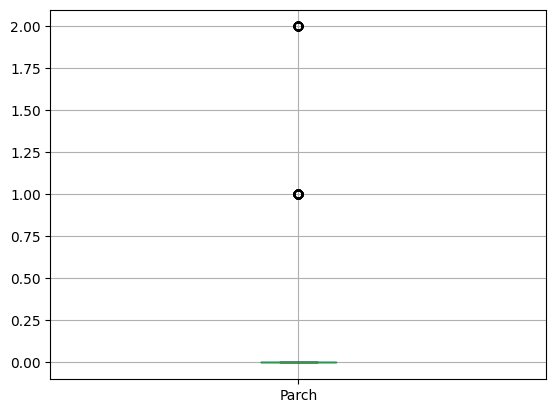

In [23]:

df.boxplot(column=['Parch'])

<Axes: >

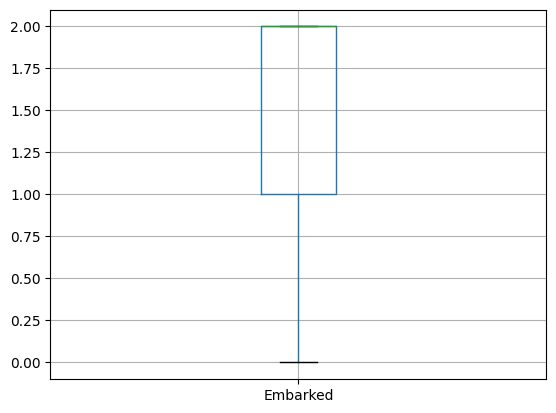

In [24]:

df.boxplot(column=['Embarked'])

<Axes: >

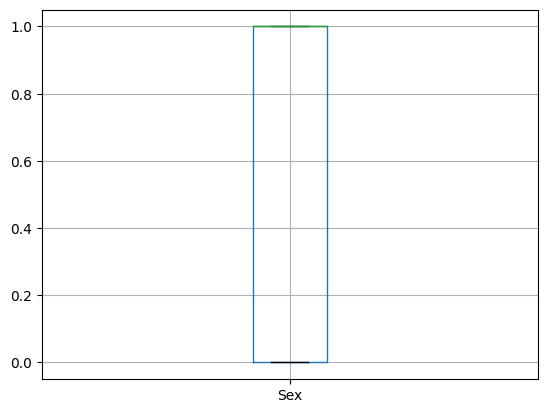

In [25]:

df.boxplot(column=['Sex'])

<Axes: >

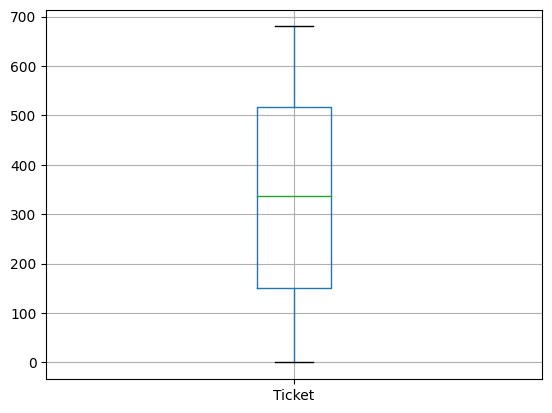

In [26]:

df.boxplot(column=['Ticket'])

<Axes: >

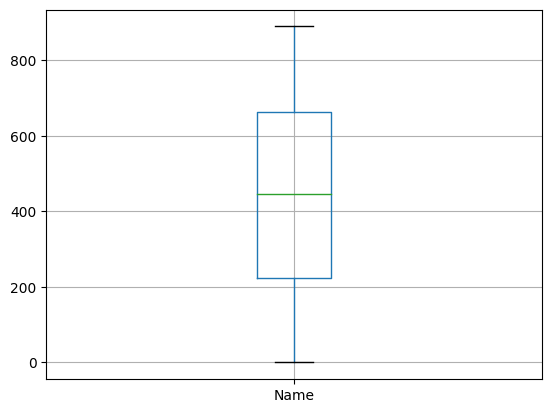

In [27]:

df.boxplot(column=['Name'])

<Axes: >

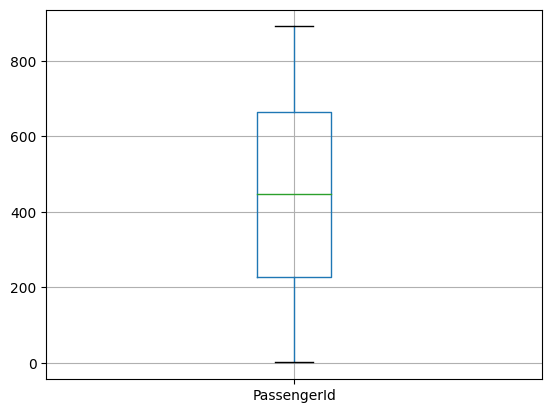

In [28]:

df.boxplot(column=['PassengerId'])

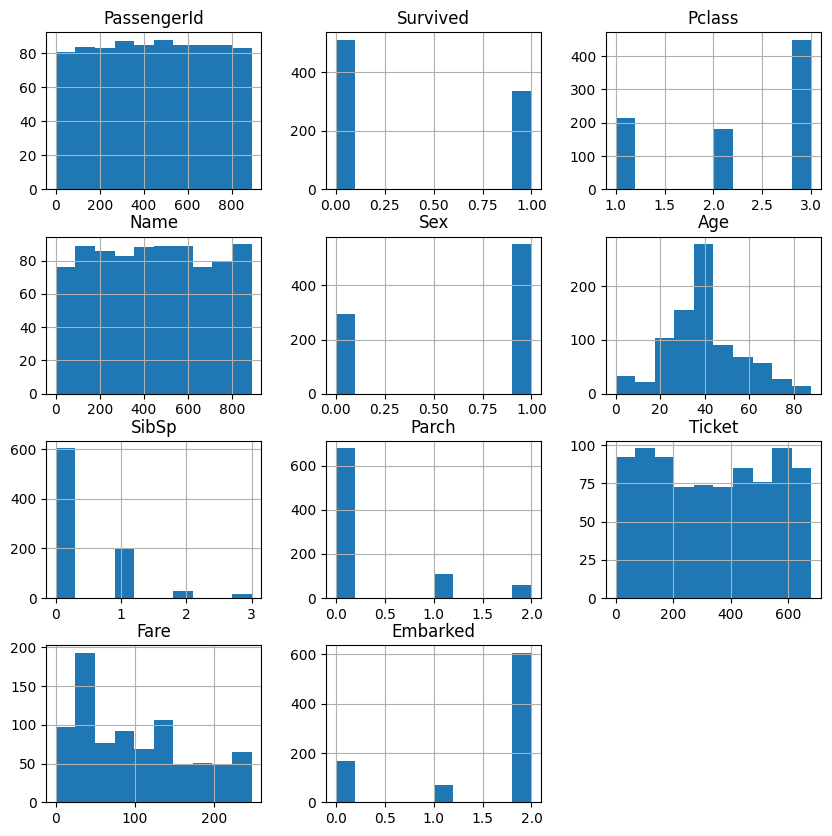

In [29]:
#Histogram
df.hist(figsize=(10,10))
plt.show()

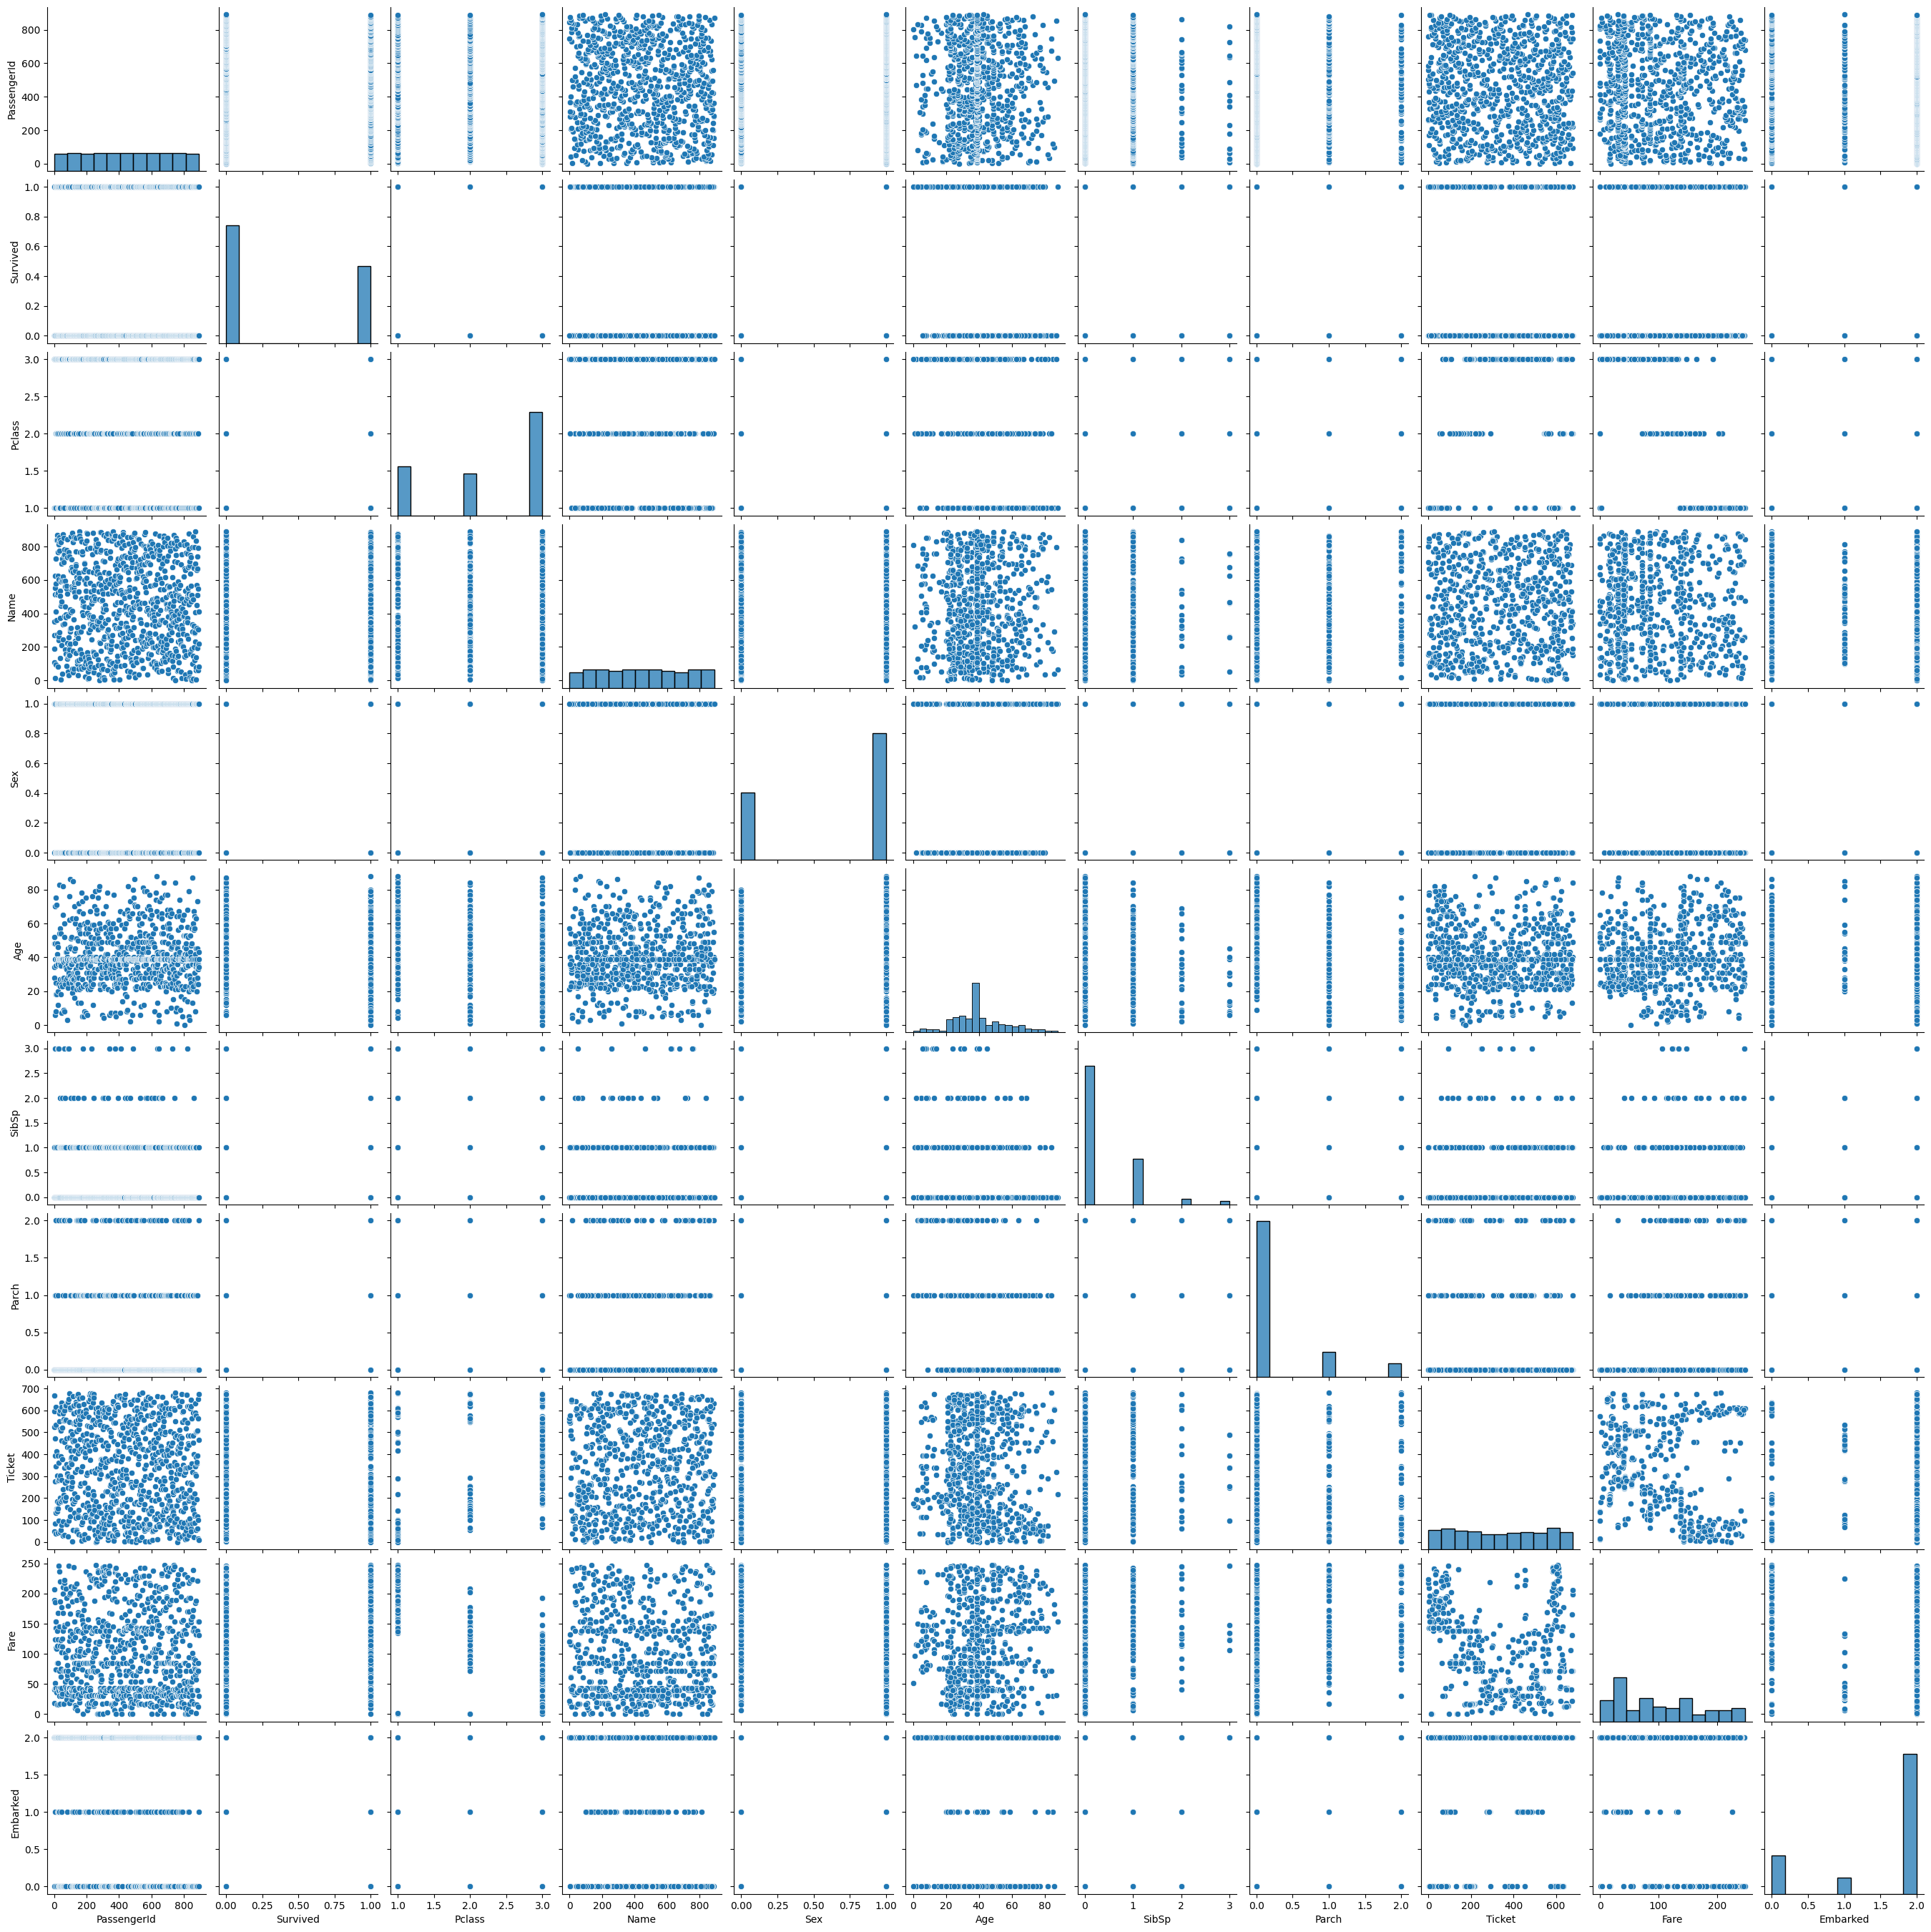

In [30]:
#Scatter Plot

sns.pairplot(df)
plt.show()

Pattern Recognisation & Insights

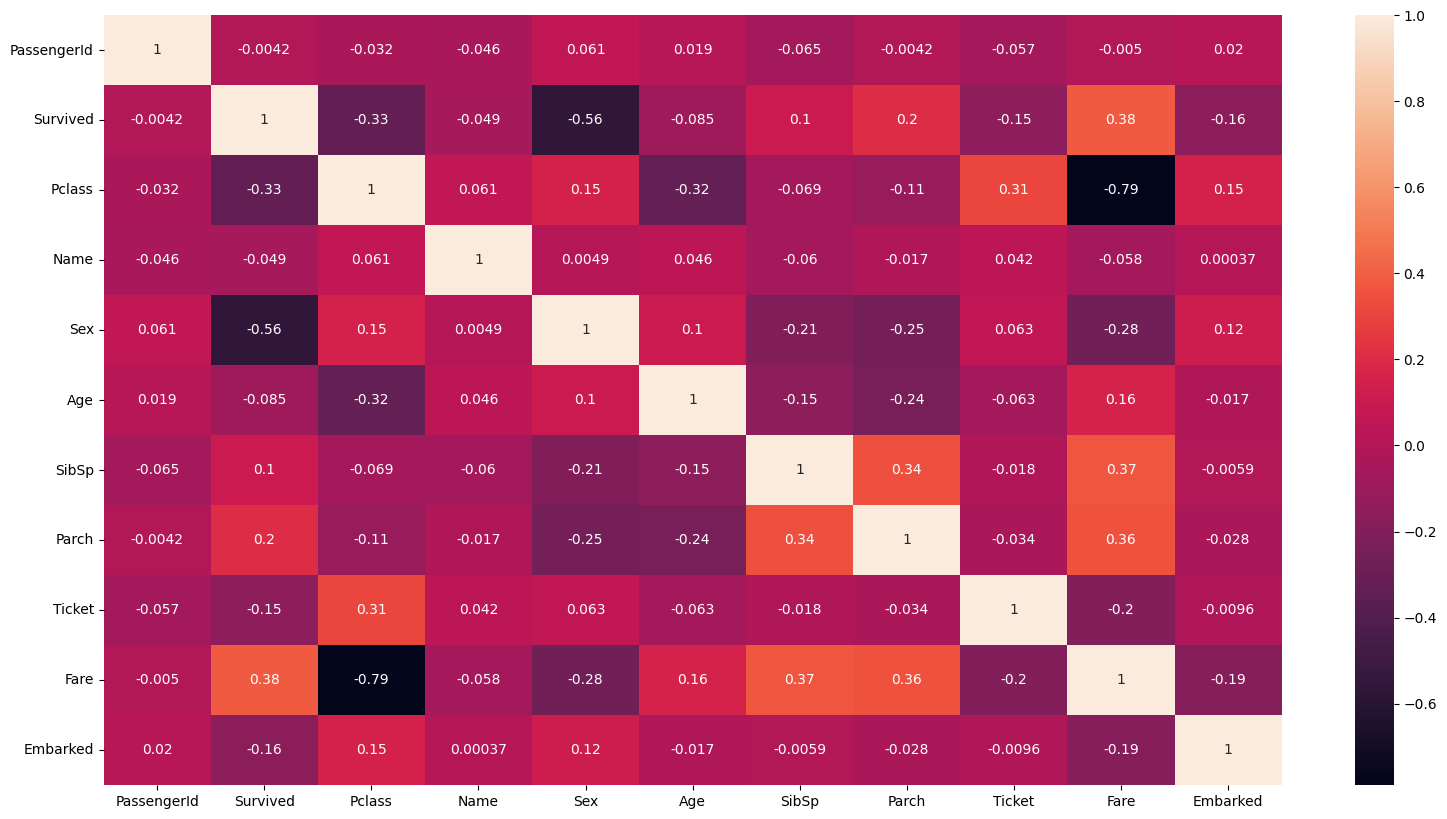

In [31]:
#Correlation heatmap
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [32]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.004157,-0.031943,-0.045954,0.060865,0.019023,-0.064608,-0.004176,-0.057449,-0.004958,0.020374
Survived,-0.004157,1.000000,-0.329268,-0.048957,-0.563737,-0.085376,0.101630,0.204840,-0.150478,0.381751,-0.160273
Pclass,-0.031943,-0.329268,1.000000,0.060868,0.147712,-0.323878,-0.068848,-0.110969,0.311010,-0.789785,0.152732
Name,-0.045954,-0.048957,0.060868,1.000000,0.004877,0.046087,-0.060015,-0.016681,0.042010,-0.058181,0.000374
Sex,0.060865,-0.563737,0.147712,0.004877,1.000000,0.101718,-0.205549,-0.254574,0.062510,-0.277225,0.118801
Age,0.019023,-0.085376,-0.323878,0.046087,0.101718,1.000000,-0.150909,-0.240884,-0.062871,0.156371,-0.016865
SibSp,-0.064608,0.101630,-0.068848,-0.060015,-0.205549,-0.150909,1.000000,0.343075,-0.018142,0.367542,-0.005886
Parch,-0.004176,0.204840,-0.110969,-0.016681,-0.254574,-0.240884,0.343075,1.000000,-0.033582,0.356196,-0.028108
Ticket,-0.057449,-0.150478,0.311010,0.042010,0.062510,-0.062871,-0.018142,-0.033582,1.000000,-0.197805,-0.009587
Fare,-0.004958,0.381751,-0.789785,-0.058181,-0.277225,0.156371,0.367542,0.356196,-0.197805,1.000000,-0.186015


#Model Building

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,2
1,2,1,1,190,0,52,1,0,596,207,0
2,3,1,3,353,0,34,0,0,669,41,2
3,4,1,1,272,0,48,1,0,49,189,2
4,5,0,3,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,35,0,0,101,85,2
887,888,1,1,303,0,24,0,0,14,153,2
888,889,0,3,413,0,39,1,2,675,131,2
889,890,1,1,81,1,34,0,0,8,153,0


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,2
1,2,1,1,190,0,52,1,0,596,207,0
2,3,1,3,353,0,34,0,0,669,41,2
3,4,1,1,272,0,48,1,0,49,189,2
4,5,0,3,15,1,48,0,0,472,43,2


In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
#Dividing our data into input and output variables
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [38]:
#Logistic regression and fit the model
df_model = LogisticRegression()
df_model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
from sklearn.model_selection import train_test_split
y = df['Survived']
x = df.drop('Survived', axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size=0.2, random_state=42)

In [56]:
print(X_Train.shape[0],X_Test.shape[0])

676 170


In [57]:
print(Y_Train.shape[0], Y_Test.shape[0])

676 170


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = LogisticRegression()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.7352941176470589

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       104
           1       0.67      0.62      0.65        66

    accuracy                           0.74       170
   macro avg       0.72      0.71      0.72       170
weighted avg       0.73      0.74      0.73       170


 confussion matrix:
 [[84 20]
 [25 41]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.6411764705882353

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       104
           1       0.54      0.52      0.53        66

    accuracy                           0.64       170
   macro avg       0.62      0.62      0.62       170
weighted avg       0.64      0.64      0.64       170


 confussion matrix:
 [[75 29]
 [32 34]]


In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.7647058823529411

 clasification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       104
           1       0.69      0.71      0.70        66

    accuracy                           0.76       170
   macro avg       0.75      0.76      0.75       170
weighted avg       0.77      0.76      0.77       170


 confussion matrix:
 [[83 21]
 [19 47]]


In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.7235294117647059

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       104
           1       0.65      0.64      0.64        66

    accuracy                           0.72       170
   macro avg       0.71      0.71      0.71       170
weighted avg       0.72      0.72      0.72       170


 confussion matrix:
 [[81 23]
 [24 42]]


In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8411764705882353

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.82      0.76      0.79        66

    accuracy                           0.84       170
   macro avg       0.84      0.83      0.83       170
weighted avg       0.84      0.84      0.84       170


 confussion matrix:
 [[93 11]
 [16 50]]


In [63]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.05, max_depth = 10, n_estimators = 100, subsample = 1)
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8117647058823529

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.79      0.70      0.74        66

    accuracy                           0.81       170
   macro avg       0.81      0.79      0.80       170
weighted avg       0.81      0.81      0.81       170


 confussion matrix:
 [[92 12]
 [20 46]]


In [64]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 'n_estimators': [100, 500, 1000], 'colsample_bytree': [0.3, 0.7, 1], 'subsample': [0.3, 0.7, 1],}
xgbC = XGBClassifier()
optimize_model = GridSearchCV(estimator=xgbC, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 1}


In [65]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.05, max_depth = 10, n_estimators = 100, subsample = 1)
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8117647058823529

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.79      0.70      0.74        66

    accuracy                           0.81       170
   macro avg       0.81      0.79      0.80       170
weighted avg       0.81      0.81      0.81       170


 confussion matrix:
 [[92 12]
 [20 46]]


#ROC Curve - Improving by optimal thershold

[0.         0.01515152 0.16666667 0.16666667 0.43939394 0.43939394
 0.45454545 0.45454545 0.46969697 0.46969697 0.59090909 0.59090909
 0.60606061 0.60606061 0.62121212 0.62121212 0.66666667 0.66666667
 0.68181818 0.68181818 0.6969697  0.6969697  0.71212121 0.71212121
 0.75757576 0.75757576 0.77272727 0.77272727 0.78787879 0.78787879
 0.81818182 0.81818182 0.83333333 0.83333333 0.86363636 0.86363636
 0.87878788 0.87878788 0.89393939 0.89393939 0.90909091 0.90909091
 0.92424242 0.92424242 0.93939394 0.93939394 0.95454545 0.95454545
 0.96969697 0.96969697 0.98484848 0.98484848 1.        ]
[0.         0.         0.         0.00961538 0.00961538 0.01923077
 0.01923077 0.02884615 0.02884615 0.03846154 0.03846154 0.04807692
 0.04807692 0.05769231 0.05769231 0.06730769 0.06730769 0.07692308
 0.07692308 0.09615385 0.09615385 0.11538462 0.11538462 0.13461538
 0.13461538 0.18269231 0.18269231 0.21153846 0.21153846 0.23076923
 0.23076923 0.29807692 0.29807692 0.375      0.375      0.50961538
 0.50

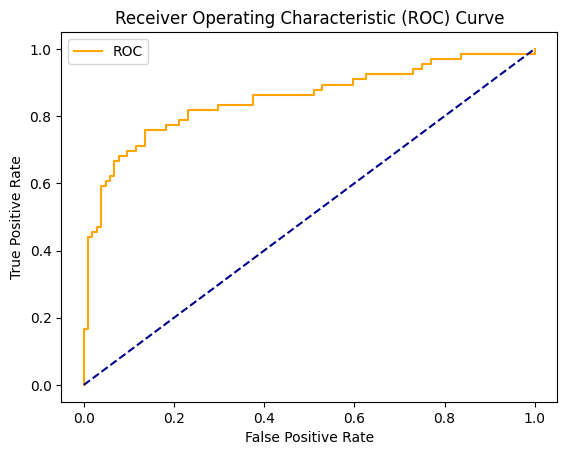

In [66]:
pred_prob = model.predict_proba(X_Test)[:,1]
from sklearn import metrics
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()
y_true = Y_Test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [67]:
pred = 1*(pred_prob > optimal_threshold)

Refinding the optimal threshold from ROC

In [68]:
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8176470588235294

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       104
           1       0.78      0.74      0.76        66

    accuracy                           0.82       170
   macro avg       0.81      0.80      0.81       170
weighted avg       0.82      0.82      0.82       170


 confussion matrix:
 [[90 14]
 [17 49]]


#Interpretation

In [69]:
#interpreting the logistic regression coefficients
df_model.coef_

array([[-2.54751998e-03,  4.74490003e-03, -1.07289593e+00, ...,
         9.82426094e-01, -4.78585985e-01,  4.85497958e-03],
       [ 4.41992858e-03, -1.62242680e-02, -8.95080235e-01, ...,
         7.69841669e-01,  4.28219936e-01, -1.65068827e-02],
       [ 6.90842658e-03, -3.47522213e-03, -5.37877580e-01, ...,
         8.11282025e-01, -4.68486567e-01, -5.06383088e-04],
       ...,
       [-5.12021345e-03, -4.31957901e-03, -4.38880451e-01, ...,
         7.02774325e-01, -1.01056103e-02, -2.29900354e-03],
       [ 8.85357401e-03,  4.24375404e-03, -2.42179878e-01, ...,
        -6.83721375e-01,  1.15826505e+00, -5.71886855e-03],
       [-3.03982783e-03,  5.37416985e-03, -5.95061222e-01, ...,
         8.17315564e-01, -3.58012014e-01, -5.38232953e-03]])

In [77]:
#interpret the logit model
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.452480
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Survived         Pseudo R-squared: 0.326     
Date:               2024-07-19 08:15 AIC:              785.5954  
No. Observations:   846              BIC:              833.0006  
Df Model:           9                Log-Likelihood:   -382.80   
Df Residuals:       836              LL-Null:          -567.96   
Converged:          1.0000           LLR p-value:      2.9090e-74
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
PassengerId   0.0006    0.0003    1.6323  0.1026  -0.0001   0.0013
Pclass        0.1516    0.1127    1.3453  0.1785  -0.0692   0.